## Visualisation basics

In the previous notebook, we learnt how to retrieve data from the CDS and produce simple visualisations with **earthkit**. In the next example, we will learn how to further customise **earthkit-maps** visualisations using a few different kinds of CDS datasets.

As always, we start by importing earthkit.

In [1]:
import earthkit as ek

### A practical example - El Niño and La Niña comparison

Let's apply what we learnt in the previous notebook to a more practical example - comparing sea surface temperatures in the pacific between El Niño conditions, La Niña conditions and normal conditions.

Let's compare the El Niño of 1997 to the La Niña of 1998 - and also add in a more "normal" year (1993) for reference. The effects of El Niño often peak in December, so let's create a dictionary defining our different years and conditions:

In [2]:
YEARS = {
    1993: "Normal conditions",
    1997: "El Niño",
    1998: "La Niña",
}

This dictionary will be useful later for quickly matching the data we are about to retrieve to the conditions that each year represents.

We're also only interested in an area over the Pacific Ocean for our El Niño comparison. **earthkit** provides some useful utility objects which allow us to pass information like bounding box extents between components, without worrying about things like the order of our extents (which tends to be different in every different piece of software!). So let's import the `BoundingBox` object from `earthkit.data.utils.bbox`

In [3]:
from earthkit.data.utils.bbox import BoundingBox

Let's create a bounding box which spans from -20°S to 20°N, and 100°E (in the west!) to 60°W (in the east!).

In [4]:
bbox = BoundingBox(
    north=20,
    south=-20,
    east=-60,
    west=100,
)

#### Retrieving the data

Let's retrieve **ERA5 monthly mean sea surface temperature** for **December** in each of our years of interest. In order to reduce the amount of data we have to handle, we can also pass our `bbox` directly into the request payload:

In [5]:
data = ek.data.from_source(
    "cds", "reanalysis-era5-single-levels-monthly-means",
    {
        "product_type": "monthly_averaged_reanalysis",
        "variable": "sea_surface_temperature",
        "year": list(YEARS),
        "month": "12",
        "time": "00:00",
        "area": bbox,
    },
)

We can use **earthkit** to quickly see how many 2-dimensional "fields" we have in our data, by using the `data.ls()` method:

In [6]:
data.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,sst,surface,0,19931201,0,0,an,0,regular_ll
1,ecmf,sst,surface,0,19971201,0,0,an,0,regular_ll
2,ecmf,sst,surface,0,19981201,0,0,an,0,regular_ll


As expected, we have three fields of SST (sea surface temperature) for December of 1993, 1997 and 1998.

#### Visualising the data

For this particular example, we want to use a **visualisation style** which emphasises the differences that we want to hightlight in our data - namely, the areas in which sea surface temperature changes significantly between El Niño and La Niña conditions. To do this, we can create an **earthkit-maps `Style`** object, containing the colours, levels and units that we want to see on our visualisation.

In [7]:
style = ek.maps.styles.Contour(
    colors="Spectral_r",  # this is a named matplotlib colormap
    levels=range(15, 33),
    units="celsius",
)

Now we can plot our data with our newly-created style:

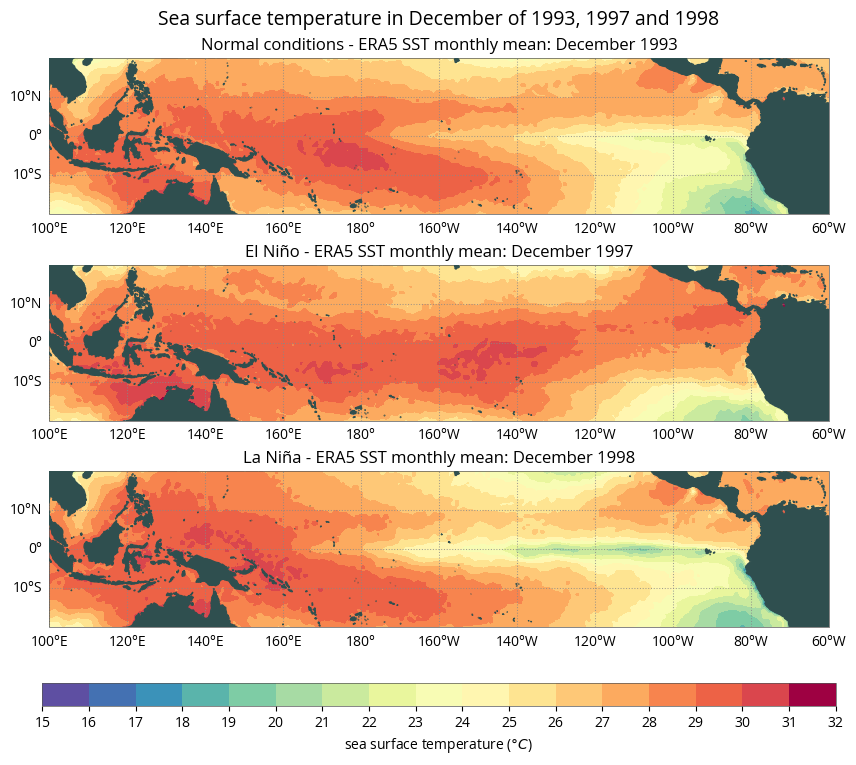

In [8]:
chart = ek.maps.Superplot(domain=bbox, rows=3)

chart.plot(data, style=style)  # this automatically converts units

chart.land(color="darkslategrey", zorder=10)
chart.gridlines(xlocs=range(-180, 180, 20), ylocs=range(-20, 20, 10))

for subplot, conditions in zip(chart, YEARS.values()):
    # Add a title to each subplot, using our convenient dictionary of conditions
    # to quickly add suitable titles
    subplot.title(f"{conditions} - ERA5 {{short_name!u}} monthly mean: {{time:%B %Y}}")
    
chart.title("{variable_name} in {time:%B} of {time:%Y}", fontsize=14)
    
chart.legend(label="{variable_name!l} ({units})", location="bottom", ticks=range(15, 33))
    
chart.show()